In [1]:
!git clone https://github.com/Skyfallk/2024_deep_gen_models

Cloning into '2024_deep_gen_models'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 99 (delta 17), reused 83 (delta 7), pack-reused 0
Receiving objects: 100% (99/99), 22.47 MiB | 30.15 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [4]:
cd /content/2024_deep_gen_models/HW_1.Bias_gen_and_autoencoders

/content/2024_deep_gen_models/HW_1.Bias_gen_and_autoencoders


# Style generator

In [34]:
import numpy as np
from styles import styles, styles_count

def style_generator(styles, styles_count):
  styles_probs = {category: [(variant + 1) / (sum(probs) + len(probs))
                             for variant in probs]
                  for category, probs in styles_count.items()}

  while True:
    style = dict()
    prob = list()
    for key in styles_probs:
      style[key] = np.random.choice(styles[key], p=styles_probs[key])
      prob.append(styles_probs[key][styles[key].index(style[key])])
    yield style, np.mean(prob)

In [40]:
gen = style_generator(styles, styles_count)
for i in range(5):
  print('стиль: {},\nвероятность: {}\n'.format(*next(gen)))

стиль: {'прическа': 'короткая прямые', 'цвет волос': 'серебристо серый', 'аксесуар': 'солнцезащитные очки', 'одежда': 'футболка с V-вырезом', 'цвет одежды': 'белый'},
вероятность: 0.24937936270590444

стиль: {'прическа': 'длинные прямые', 'цвет волос': 'блонд', 'аксесуар': 'солнцезащитные очки', 'одежда': 'футболка с круглым вырезом', 'цвет одежды': 'зеленый'},
вероятность: 0.28224361145037097

стиль: {'прическа': 'длинные прямые', 'цвет волос': 'серебристо серый', 'аксесуар': 'круглые очки', 'одежда': 'худи', 'цвет одежды': 'оранжевый'},
вероятность: 0.3140562540958048

стиль: {'прическа': 'длинные прямые', 'цвет волос': 'рыжий', 'аксесуар': 'круглые очки', 'одежда': 'футболка с круглым вырезом', 'цвет одежды': 'розовый'},
вероятность: 0.30825439312153

стиль: {'прическа': 'короткая курчавые', 'цвет волос': 'серебристо серый', 'аксесуар': 'нет очков', 'одежда': 'футболка с V-вырезом', 'цвет одежды': 'розовый'},
вероятность: 0.21959931727678192



# Avatar generator

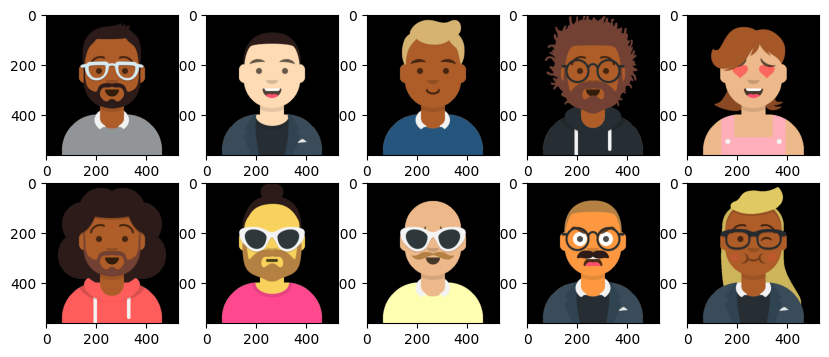

11 560 528 3


In [50]:
import os
import cv2
import matplotlib.pyplot as plt

avatars = [cv2.imread(f'./avatars/{fn}')[..., ::-1] for fn in os.listdir('./avatars/')]

fig, axis = plt.subplots(ncols=5, nrows=2, figsize=(10, 4))
for i, img in enumerate(avatars[:10]):
  axis[i // 5, i % 5].imshow(img)
plt.show()

print(len(avatars), *avatars[0].shape)

In [85]:
from tqdm import tqdm

shape = avatars[0].shape

pixels = [[list() for x in range(shape[1])] for y in range(shape[0])]
pixels_count = [[list() for x in range(shape[1])] for y in range(shape[0])]

for img in tqdm(avatars):
  for y in range(shape[0]):
    for x in range(shape[1]):
      value = tuple(img[y, x])
      if value in pixels[y][x]:
        pixels_count[y][x][pixels[y][x].index(value)] += 1
      else:
        pixels[y][x].append(value)
        pixels_count[y][x].append(1)

pixels_probs = [[[(variant + 1) / (sum(pixels_count[y][x]) + len(pixels_count[y][x]))
                   for variant in pixels_count[y][x]]
                  for x in range(shape[1])]
                 for y in range(shape[0])]

pixels[300][300], pixels_count[300][300], pixels_probs[300][300]

100%|██████████| 11/11 [00:08<00:00,  1.22it/s]


((174, 93, 41), 5, 0.3333333333333333)

In [126]:
def avatar_generator(pixels, pixels_probs, shape):
  while True:
    result = np.zeros(shape)
    for y in range(shape[0]):
      for x in range(shape[1]):
        result[y, x, :] = pixels[y][x][np.random.choice(np.arange(len(pixels[y][x])), p=pixels_probs[y][x])]
    yield result.astype('uint8')

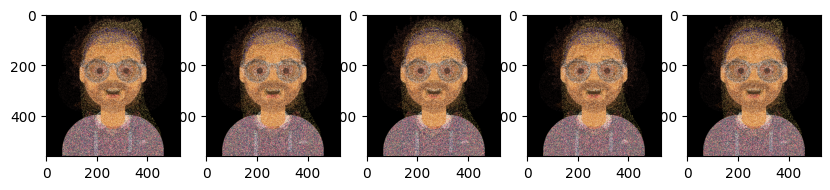

In [129]:
gen = avatar_generator(pixels, pixels_probs, shape)

fig, axis = plt.subplots(ncols=5, nrows=1, figsize=(10, 2))
for i in range(5):
  img = next(gen)
  cv2.imwrite(f'./{str(i)}.png', img[..., ::-1])
  axis[i].imshow(img)
plt.show()